In [1]:
#!/usr/bin/python
import math
import numpy as np
import pandas
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab

In [2]:
data = pandas.read_csv('data.csv', sep='\t', na_values=".")

In [3]:
# Data table of SP prices
data

,Dias,Precio
0,0,142.555250
1,1,142.372324
2,2,142.168942
3,5,136.461598
4,6,137.645855
5,7,138.464688
6,8,136.734903
7,9,136.857728
8,12,138.659161
9,13,140.726714


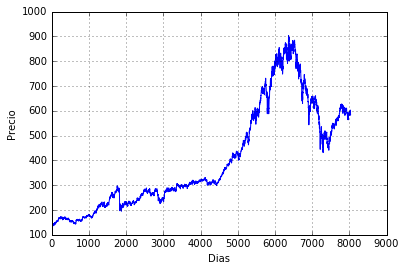

In [4]:
# Plot it
plt.plot(data['Dias'], data['Precio'])
plt.xlabel("Dias")
plt.ylabel("Precio")
plt.grid()
plt.show()

In [14]:
# Weekly Porcentual Gain 
Pgain5 = np.array([100 * (data['Precio'][t+5] - data['Precio'][t])/(data['Precio'][t]) for t in xrange(len(data['Precio'])-5)])
Pgain5_pos = np.array([i for i in Pgain5 if i>0])
print np.mean(Pgain5)
print np.std(Pgain5)
print float(Pgain5_pos.size)/float(Pgain5.size)*100
(mu, sigma) = norm.fit(Pgain5)

0.156076961662
2.29174942141
55.4012623986


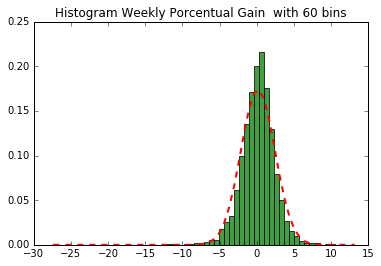

In [15]:
# the histogram of the data Weekly Porcentual Gain 
n, bins, patches = plt.hist(Pgain5, 60, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

 
plt.title("Histogram Weekly Porcentual Gain  with 60 bins")
plt.show()

In [16]:
# Yearly Porcentual Gain 
Pgainyear = np.array([100 * (data['Precio'][t+252] - data['Precio'][t])/(data['Precio'][t]) for t in xrange(len(data['Precio'])-252)])
Pgainyear_pos = np.array([i for i in Pgainyear if i>0])
print np.mean(Pgainyear)
print np.std(Pgainyear)
print float(Pgainyear_pos.size)/float(Pgainyear.size)*100
(mu1, sigma1) = norm.fit(Pgainyear)

7.74870310271
15.723439026
71.6685541714


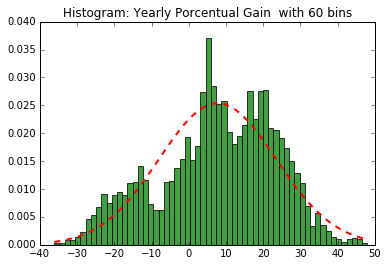

In [17]:
# the histogram of the data Yearly Porcentual Gain 
n1, bins1, patches1 = plt.hist(Pgainyear, 60, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y1 = mlab.normpdf( bins1, mu1, sigma1)
l1 = plt.plot(bins1, y1, 'r--', linewidth=2)

 
plt.title("Histogram: Yearly Porcentual Gain  with 60 bins")
plt.show()

In [50]:
Pgain5_2 = np.array([i-np.mean(Pgain5) for i in Pgain5 if i>-7and i<8 ])
(mu2, sigma2) = norm.fit(Pgain5_2)


In [53]:
nbins = 30

for divisions in xrange(nbins):
    partition = (max(Pgain5_2)+abs(min(Pgain5_2)))/(divisions)
    for interval in xrange(divisions):
        a = min(Pgain5_2) + partition*interval
        b = min(Pgain5_2) + partition*(interval+1)
        ininterval = np.array([i for i in Pgain5  if (i>a)&(i<b)])
        print a,b,partition,divisions
        print "isize: "+str(ininterval.size)
        print interval

-7.09467315231 7.80429200005 14.8989651524 1
isize: 5501
0
-7.09467315231 0.35480942387 7.44948257618 2
isize: 2860
0
0.35480942387 7.80429200005 7.44948257618 2
isize: 2641
1
-7.09467315231 -2.12835143486 4.96632171745 3
isize: 660
0
-2.12835143486 2.8379702826 4.96632171745 3
isize: 4357
1
2.8379702826 7.80429200005 4.96632171745 3
isize: 484
2
-7.09467315231 -3.36993186422 3.72474128809 4
isize: 272
0
-3.36993186422 0.35480942387 3.72474128809 4
isize: 2588
1
0.35480942387 4.07955071196 3.72474128809 4
isize: 2474
2
4.07955071196 7.80429200005 3.72474128809 4
isize: 167
3
-7.09467315231 -4.11488012184 2.97979303047 5
isize: 150
0
-4.11488012184 -1.13508709137 2.97979303047 5
isize: 1196
1
-1.13508709137 1.84470593911 2.97979303047 5
isize: 3100
2
1.84470593911 4.82449896958 2.97979303047 5
isize: 972
3
4.82449896958 7.80429200005 2.97979303047 5
isize: 83
4
-7.09467315231 -4.61151229358 2.48316085873 6
isize: 99
0
-4.61151229358 -2.12835143486 2.48316085873 6
isize: 561
1
-2.1283514

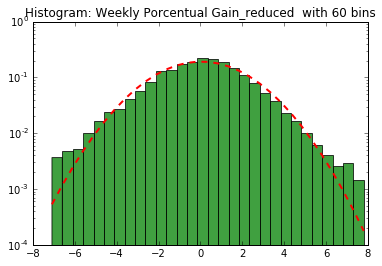

In [55]:
# the histogram of the data Yearly Porcentual Gain 
n2, bins2, patches2 = plt.hist(Pgain5_2, 30, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y2 = mlab.normpdf( bins2, mu2, sigma2)
l2 = plt.plot(bins2, y2, 'r--', linewidth=2)

plt.title("Histogram: Weekly Porcentual Gain_reduced  with 60 bins")
plt.yscale('log') 
plt.show()

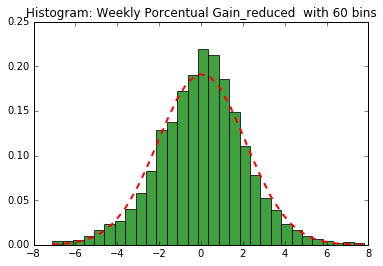

In [77]:
Hist = plt.hist(Pgain5_2, 30, normed=1, facecolor='green', alpha=0.75)
y2 = mlab.normpdf( bins2, mu2, sigma2)
l2 = plt.plot(bins2, y2, 'r--', linewidth=2)
plt.title("Histogram: Weekly Porcentual Gain_reduced  with 60 bins")
plt.show()

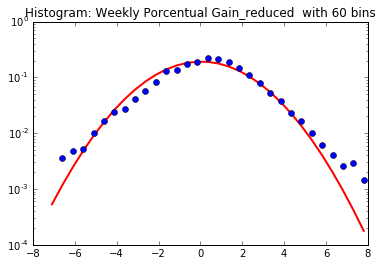

In [76]:
y2 = mlab.normpdf( bins2, mu2, sigma2)
l2 = plt.plot(bins2, y2, 'r', linewidth=2)

plt.plot(np.delete(Hist[1], 0, 0),Hist[0] , 'bo', linewidth=2) 

plt.title("Histogram: Weekly Porcentual Gain_reduced  with 30 bins")
plt.yscale('log') 
plt.show()

In [ ]:

print Hist[0]
print np.delete(Hist[1], 0, 0)
print Hist[1]